# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

# (0) Importing and scaling data

Firstly, all packages are imported and and data is loaded. X data is scaled for easier user later on.

In [1]:
%pylab inline

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris                   # Data used in BONUS exercise
from sklearn.preprocessing import StandardScaler         # to normalize data
from sklearn.model_selection import train_test_split     # To split in train and test set
from sklearn.model_selection import cross_val_score      # Cross Validation Score
from sklearn.linear_model import LogisticRegression      # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier       # k-Nearest Neighbours classifier
from sklearn.metrics import confusion_matrix, classification_report # Reports functions

# load Digits dataset and split in train and test set.
digits = load_digits()
X_mnist = reshape(digits.images,(1797,64))               # Input data (used in CVS)
X_train_mnist = reshape(digits.images[:1500],(1500,64))  # Input train set
X_test_mnist = reshape(digits.images[1500:],(297,64))    # Input test set
y_mnist = digits.target                                  # Output data (used in CVS)
y_train_mnist = digits.target[:1500]                     # Output train set
y_test_mnist = digits.target[1500:]                      # Output test set

# Scale Digits Input Data
scaler = StandardScaler()  
scaler.fit(X_train_mnist)
scaler.fit(X_test_mnist)
X_train_mnist_scaled = scaler.transform(X_train_mnist)
X_test_mnist_scaled = scaler.transform(X_test_mnist)

# BONUS: Load Iris dataset and split in train and test set
iris = load_iris()
X_iris = iris.data                                       # Input data (used in CVS)
X_train_iris = iris.data[:120]                           # Input train set
X_test_iris = iris.data[120:]                            # Input test set
y_iris = iris.target                                     # Output data (used in CVS)
y_train_iris = iris.target[:120]                         # Output train set
y_test_iris = iris.target[120:]                          # Output test set

# BONUS: Scale Iris Input Data
scaler.fit(X_train_iris)
scaler.fit(X_test_iris)
X_train_iris_scaled = scaler.transform(X_train_iris)
X_test_iris_scaled = scaler.transform(X_test_iris)


Populating the interactive namespace from numpy and matplotlib


# (1) Training LogR and k-NN using default settings

### main()

This is the main() function, which will be used in step (2) as well. This main function is used for both default inputs in the first part of the assignment as well as finding the optimal nearest-neighbour number and regularization parameter, for k-Nearest Neighbour and Logistic Regression respectively.

Like all other functions, main() already includes compatibility with iris data, which is used in the bonus section.

### print_defauts()
The second function print_defaults() will return the scores and standard deviation using the default settings of the imported classifier type function. This is what is asked in the first part of the Assignment and should yield all necessary results.

In [2]:
# Main function that calculates the 10-fold Cross Validation.
# lr/knn, list, boolean, mnist/iris -> [avg. score, std.dev] OR append(score) OR Error
def main(classifier, optimizer, default, data):
    if data == "mnist":
        # Use Digits dataset
        p,q,r,s = X_train_mnist_scaled, y_train_mnist, X_mnist, y_mnist
    elif data == "iris":
        # Use Iris dataset
        p,q,r,s = X_train_iris_scaled, y_train_iris, X_iris, y_iris
    else:
        # Throw error saying no data set was chosen
        raise ValueError('No data set defined')
        
    model = classifier.fit(p,q)
    score = cross_val_score(model, r, s, cv=10)
    # if True (default input): Return score and average of scores
    if default == True:
        std_dev = score.std()
        return [average(score), std_dev]
    # if False (custom input): Append value average to list
    else:
        optimizer.append(average(score))

# Function that prints out the default results
# lr/knn, name, mnist/iris -> print(name, avg.score, std.dev)
def print_defaults(classifier, name, data):
    # Save answers of main function in a list so it only has to run once per Classifier type - saves time!
    answers = main(classifier, [], True, data)
    print(name, "Value analysis on the", data,"dataset:",
          "\n avg.score:", answers[0],
          "\n std.dev.: ", answers[1])

### Results of default values

Here, nothing but the default settings for both LogR and k-NN functions are used. The program outputs the averages of the 10-fold using the default input.

In [3]:
# Apply logistic regression to both types
print_defaults(KNeighborsClassifier(), "k-Nearest Neighbour", "mnist")
print_defaults(LogisticRegression(), "Logistic Regression", "mnist")

k-Nearest Neighbour Value analysis on the mnist dataset: 
 avg.score: 0.973948287255 
 std.dev.:  0.0165496015374
Logistic Regression Value analysis on the mnist dataset: 
 avg.score: 0.931029834684 
 std.dev.:  0.0347846545518


As it turns out, the Cross Validation Score and Standard deviation are much better when using the k-Nearest Neighbour method, assuming default input values.

However, the Logistic Regression method still produces reasonable results.

## (2a) Optimizing k for k-NN

In this part, we try to find the optimal k for k-NN. A plot shows the success rates with varying k's, and the program also returns the optimal rate and its associated k value.

The main() function is used in a for-loop that collects all success rates and appends them to k_list. If we read k_list and associate the correct k-values with them, we can plot out all k and their rates using plt.plot(). Additionally, we can print the highest score found in our results (and thus the highest point in our graph), with the corresponding k included. In the end, this is exactly the answer to finding the optimal k.

The highest rate 0.97778921138 is achieved with k = 3


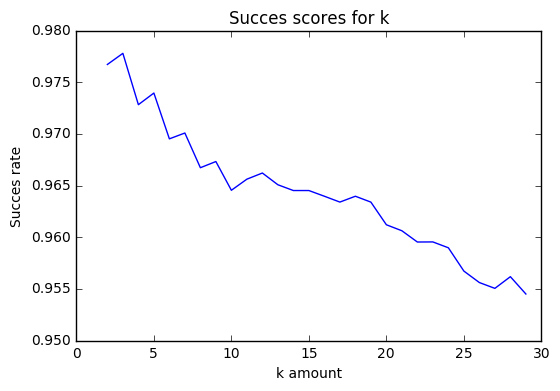

In [4]:
# Make en empty list. The loop will fill this with the average value scores for each k.
k_list = []

# A Loop that checks k between 2 and 30 and prints it in k_list in increasing order.
K = range(2,30)
for i in K:
    knn = KNeighborsClassifier(n_neighbors = i)
    main(knn, k_list, False, "mnist")
    
# Save the maximum (that will be used multiple times) so the algorithm is faster
max_k_list = max(k_list)

# Makes a plot for good visualization. The highest peak is the optimal average rate at that k.
plt.title("Succes scores for k")
plt.ylabel("Succes rate")
plt.xlabel("k amount")
plt.plot(K,k_list)

# Prints the optimal average rate and its associated k value.
print("The highest rate", max_k_list, "is achieved with k =", K[k_list.index(max_k_list)])

As most data sets perform the best CV scores with a k between 3 and 10, this set is no exception.

*At k = 3, the highest achievable average score is 0.9778*.

Why choose for the region 2 to 30? At k = 1, you are not actually dividing up the data at all, so it is irrelevant. 30 was arbitrarly picked, but it is fairly obvious that increasing this number will not yield a better score: the graph shows a steady decline from k = 3 onwards. It is safe to say that we immediately found the optimal k, and it is included in this graph.

## (2b) Optimizing regularization (lambda) for LogR

In a very similar fashion, we can calculate the optimal regularization parameter. Used once more is a loop that calls upon the main() function and appends the results in c_list, which is later used in conjunction with the range to plot a graph and print the supposed maximum value at the optimal lambda.

The LogisticRegression() function takes the argument C, which is the inverse of lambda (C = 1/lambda). The code inverts the graph's x-axis and printed result to account for this.

The highest rate 0.941602537134 is achieved with lambda = 20.5673758865


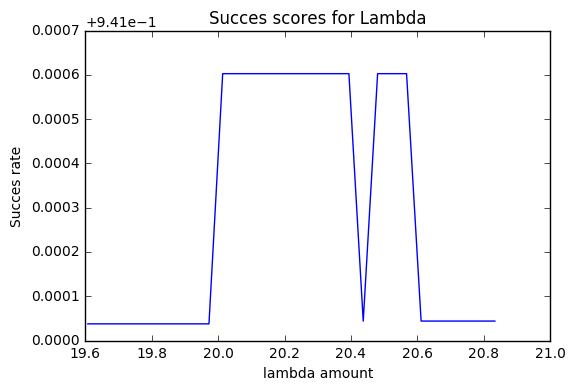

In [5]:
# Make en empty list. The loop will fill this with the average value scores for each lambda.
c_list = []

# A Loop that checks C between 0.048 and 0.051 and prints it in c_list in increasing order.
C = np.linspace(0.048, 0.051, num=30)
for i in C:
    lr = LogisticRegression(C=i)
    main(lr,c_list,False,"mnist")

# Save the maximum (that will be used multiple times) so the algorithm is faster
max_c_list = max(c_list)
    
# Makes a plot for good visualization. The highest peak is the optimal average rate at that lambda.
plt.title("Succes scores for Lambda")
plt.ylabel("Succes rate")
plt.xlabel("lambda amount")
plt.plot(1/C,c_list)

# Prints the optimal average rate and its associated lambda value. 
print("The highest rate",max_c_list,"is achieved with lambda =",1/C[c_list.index(max_c_list)]) 

Picking the correct lambda region was a lot harder than picking the k region: we started between 2 and 30 (similar to k), and it quickly showed that the optimal was around 20. Zooming in gives the graph depicted above, where there is not one peak, but there are two ranges that appear to have the same chance. It is likely there is a miniscule difference between the lambda rates, but this amount is so insignificant that it is not reported in this assignment. The optimal rate is present roughly between the region [20.00, 20.55].

Even though the script prints the first highest point on the right, the graph shows a larger peak range on the left. Thus, instead, we will take the middle point of this peak as our optimal lambda.

*Therefore, we assume that the actual optimized score is 0.9416 at lambda = 20.2.*

# (2c) Comparing performance

### print_report()

Now, we are going to compare performance through a Classification Report (CR) and a Confusion Matrix (CM). Since both of them use a prediction value, we can put them in the same function print_report(). This function makes a predicted y based on the scaled X test data, and then prints out, depending on the input given:

- A Classification report that compares the true y with the predicted y. It gives all target their respective recognized number.

- A Confusion Matrix that also compares the true y with the predicted y.

- If no type of input is given, the function throws an error.

In order to use the functions classification_report() and confusion_matrix(), the data has to be fitted.

In [6]:
# This list of string is used for naming in the report.
numbers = ["0","1","2","3","4","5","6","7","8","9"]
flowers = ["Setosa", "Versicolour", "Virginica"]

# Function that prints a Report or Matrix
# lr/knn, name, report/matrix, mnist/iris -> print(name, report) OR print (name, matrix) OR Error
def print_report(classifier, name, report, data):
    if data == "mnist":
        # Use Digits dataset
        p, q, r = X_test_mnist_scaled, y_test_mnist, numbers
    elif data == "iris":
        # Use Iris dataset
        p, q, r = X_test_iris_scaled, y_test_iris, flowers
    else:
        # Throw error saying no output type was chosen
        raise ValueError('No data set defined')
        
    y_predict = classifier.predict(p)
    if report == "report":
        # Print a Report
        print(name,"Classification Report:\n",
        classification_report(q, y_predict,target_names=r))
    elif report == "matrix":
        # Print a Matrix
        print(name,"Confusion Matrix:\n",
        confusion_matrix(q, y_predict),"\n")
    else:
        # Throw error saying no output type was chosen
        raise ValueError('Not defined whether a report or matrix is to be printed')
        
# Define both types correctly. k and lambda are dynamically taken from the results of (2a/b).
# The data also needs to be fitted so that it can be used by the print_report() function.
knn_mnist_fit = KNeighborsClassifier(n_neighbors=K[k_list.index(max_k_list)]).fit(X_test_mnist_scaled, y_test_mnist)
lr_mnist_fit = LogisticRegression(C=C[c_list.index(max_c_list)]).fit(X_test_mnist_scaled, y_test_mnist)

### Classification Report

In this next bit of code, the Report is printed. This report tells us to how accurately each number is correctly guessed by the algorithm.

In [7]:
# Use the CR function, for both types.
print_report(knn_mnist_fit,"k-Nearest Neighbour","report","mnist")
print_report(lr_mnist_fit,"Logistic Regression","report","mnist")

k-Nearest Neighbour Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      1.00      0.93        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
          4       1.00      1.00      1.00        33
          5       1.00      0.90      0.95        30
          6       1.00      0.97      0.98        30
          7       1.00      1.00      1.00        30
          8       1.00      0.89      0.94        28
          9       0.94      0.97      0.95        31

avg / total       0.98      0.97      0.97       297

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.94      0.95        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
       

The Reports show a slightly higher precision score with the k-NN method, while the other parameters result in the same average.

Even though, per guessed number, the recall and f1-scores differ, so so both classifier types show a different result for different numbers.

### Confusion Matrix

To print the Matrices, all we have to do is change the output type for our function. This rolls out the confusion matrices for both classifier types.

In [8]:
# Use the CR function, for both types.
print_report(knn_mnist_fit,"k-Nearest Neighbour","matrix","mnist")
print_report(lr_mnist_fit,"Logistic Regression","matrix","mnist")

k-Nearest Neighbour Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  0  0 27  0  0  0  2]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  0  0  0 25  0]
 [ 0  0  0  1  0  0  0  0  0 30]] 

Logistic Regression Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  2]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  2  0  0 25  0]
 [ 0  0  0  1  0  1  0  0  2 27]] 



Once again, for different numbers guessed, both methods yield different results. Overall, however, the k-Nearest Neighbour method made 8 wrong guesses, where the Logisitic Regression one made 10 instead.

Interestingly, the k-NN had the most repeatable faults: three times, it predicted a 1 as an 8. The LogR made the same mistake, but only once. Except for one other mistake (classifying a 3 as a 9), the two methods yielded very different faults.

# (3) Conclusion of the analysis

The k-Nearest Neighbour method performed better on every type of analysis, with exception of the repeatable fault mentioned in the paragraph above. As the optimal parameter was established as k = 3 in this assignment through various testing options, we can say that this yields the best results. Generally speaking, both algorithms performed relatively well, even with their default settings.


### Discussion: Room for improvement

- Even though most of the repeating code is turned into flexible functions that allow different input settings (different classifier types, different data, different names, etc.), the loops that are used for optimalization are seperate. It may be possible to include these in a function too, but I believe it would take me a lot of work to do this correctly.

- These loops are relatively slow, especially for Logistic Regression. It takes a minute or so to create a list of 30 different success rates for varying lambdas. I am unsure on how to improve this calculation time - perhaps it is due to LogisticRegression() working inefficiently, in which case it could be faster to rewrite this function in a faster way. It is probably due to the loop, though.

- While the functions are fairly flexible, because they use an easy-to-input argument to differ between classifier type or dataset, they need to have an if/else statement manually added for every kind of argument. This works fine if you have two different kinds (in this assignment), but if the amount increases, the function can be made more flexible by adding more arguments for the functions, to make them fully flexible.

# BONUS: The Iris dataset

Now, we could use the functions we wrote earlier to analyze the Iris dataset.

It is unfinished, as the Report and Matrix do not seem to be working correctly and I ran out of time to figure out why and on how to fix it. Default values and optimalization seem to work properly, however.

In [9]:
# Apply logistic regression to both types
print_defaults(KNeighborsClassifier(), "k-Nearest Neighbour", "iris")
print_defaults(LogisticRegression(), "Logistic Regression", "iris")

k-Nearest Neighbour Value analysis on the iris dataset: 
 avg.score: 0.966666666667 
 std.dev.:  0.04472135955
Logistic Regression Value analysis on the iris dataset: 
 avg.score: 0.953333333333 
 std.dev.:  0.06


The highest rate 0.98 is achieved with k = 13


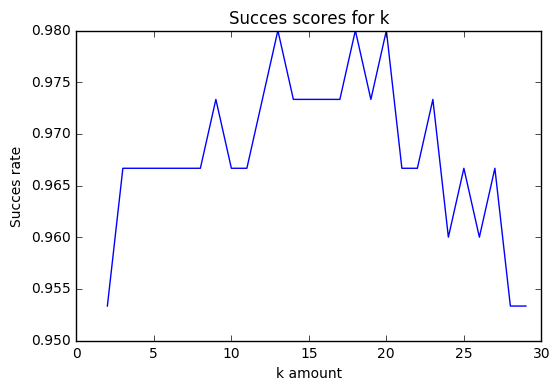

In [10]:
# Make en empty list. The loop will fill this with the average value scores for each k.
k2_list = []

# A Loop that checks k between 2 and 30 and prints it in k_list in increasing order.
K2 = range(2,30)
for i in K2:
    knn = KNeighborsClassifier(n_neighbors = i)
    main(knn, k2_list, False, "iris")
    
# Save the maximum (that will be used multiple times) so the algorithm is faster
max_k2_list = max(k2_list)

# Makes a plot for good visualization. The highest peak is the optimal average rate at that k.
plt.title("Succes scores for k")
plt.ylabel("Succes rate")
plt.xlabel("k amount")
plt.plot(K2,k2_list)

# Prints the optimal average rate and its associated k value.
print("The highest rate", max_k2_list, "is achieved with k =", K2[k2_list.index(max_k2_list)])

The highest rate 0.98 is achieved with lambda = 0.011


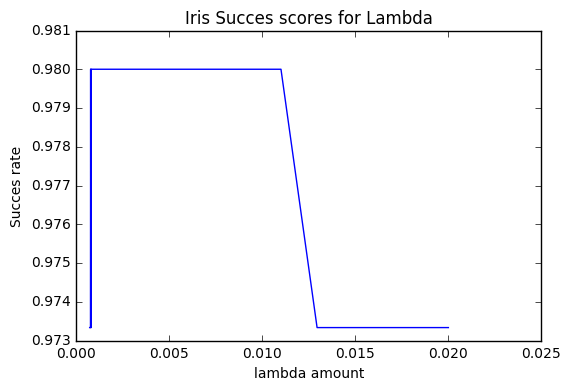

In [11]:
# Make en empty list. The loop will fill this with the average value scores for each lambda.
c2_list = []

# A Loop that checks C between 0.048 and 0.051 and prints it in c_list in increasing order.
C2 = np.linspace(50, 1400, num=100)
for i in C2:
    lr = LogisticRegression(C=i)
    main(lr,c2_list,False,"iris")

# Save the maximum (that will be used multiple times) so the algorithm is faster
max_c2_list = max(c2_list)
    
# Makes a plot for good visualization. The highest peak is the optimal average rate at that lambda.
plt.title("Iris Succes scores for Lambda")
plt.ylabel("Succes rate")
plt.xlabel("lambda amount")
plt.plot(1/C2,c2_list)

# Prints the optimal average rate and its associated lambda value. 
print("The highest rate",max_c2_list,"is achieved with lambda =",1/C2[c2_list.index(max_c2_list)]) 

In [12]:
# knn_iris_fit = KNeighborsClassifier(n_neighbors=K2[k2_list.index(max_k2_list)]).fit(X_test_iris_scaled, y_test_iris)
# lr_iris_fit = LogisticRegression(C=C2[k2_list.index(max_c2_list)]).fit(X_test_iris_scaled, y_test_iris)

### Use the CR function, for both types.
# print_report(knn_iris_fit,"k-Nearest Neighbour","report","iris")
# print_report(lr_iris_fit,"Logistic Regression","report","iris")

In [13]:
### Use the CR function, for both types.
# print_report(knn_iris_fit,"k-Nearest Neighbour","matrix","iris")
# print_report(lr_iris_fit,"Logistic Regression","matrix","iris")